In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tqdm
sns.set()

In [2]:
def change_type(df, col, type_):
    df[col] = df[col].astype(type_)
    return df

In [3]:
train_data = pd.read_csv('train_data.csv')

In [4]:
train_data.shape

(27956445, 17)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27956445 entries, 0 to 27956444
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          object 
 1   geoCluster                  int64  
 2   SKU                         int64  
 3   date                        object 
 4   sales                       float64
 5   month                       int64  
 6   day                         int64  
 7   weekday                     int64  
 8   week_num                    int64  
 9   lagerUnitType_caption       object 
 10  commodity_group             int64  
 11  productCategory_caption_RU  object 
 12  cityId                      int64  
 13  price                       float64
 14  lagerUnitQuantity           float64
 15  lagerUnitTypeId             int64  
 16  revanue                     float64
dtypes: float64(4), int64(9), object(4)
memory usage: 3.5+ GB


In [6]:
train_data.commodity_group.max()

198

In [7]:
train_data.cityId.max()

25

In [8]:
train_data.lagerUnitTypeId.max()

6

In [9]:
train_data.SKU.max()

873803

In [10]:
train_data.geoCluster.max()

3230

In [11]:
train_data = change_type(train_data, 'geoCluster', 'uint16')
train_data = change_type(train_data, 'SKU', 'uint32')
train_data = change_type(train_data, 'commodity_group', 'uint8')
train_data = change_type(train_data, 'cityId', 'uint8')
train_data = change_type(train_data, 'lagerUnitTypeId', 'uint8')

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27956445 entries, 0 to 27956444
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   ID                          object 
 1   geoCluster                  uint16 
 2   SKU                         uint32 
 3   date                        object 
 4   sales                       float64
 5   month                       int64  
 6   day                         int64  
 7   weekday                     int64  
 8   week_num                    int64  
 9   lagerUnitType_caption       object 
 10  commodity_group             uint8  
 11  productCategory_caption_RU  object 
 12  cityId                      uint8  
 13  price                       float64
 14  lagerUnitQuantity           float64
 15  lagerUnitTypeId             uint8  
 16  revanue                     float64
dtypes: float64(4), int64(4), object(4), uint16(1), uint32(1), uint8(3)
memory usage: 2.7+ GB


In [13]:
sku_meta = pd.read_csv('../sku_final.csv')

In [14]:
geo_params = pd.read_csv('../geo_params.csv')

In [15]:
test_data = pd.read_csv('../test_data.csv')

In [16]:
test_data.head()

,ID,geoCluster,SKU,date,price
0,RR1666030,21,32485,2021-07-20,66.69
1,RR1666031,21,32485,2021-07-21,66.69
2,RR1666032,21,32485,2021-07-22,66.69
3,RR1666033,21,32485,2021-07-23,66.69
4,RR1666034,21,32485,2021-07-24,66.69


In [17]:
train_data = train_data.sort_values(by=['week_num'])

In [18]:
train_data['week_num'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

In [19]:
train_data[train_data['week_num'].isin([51,53])].sales.mean()

0.24557248818772717

In [20]:
test_data['geoCluster'].value_counts()

2043    12950
2022    12558
2049    12516
2735    11984
1935    11648
        ...  
2953       14
607        14
3095       14
149        14
287        14
Name: geoCluster, Length: 515, dtype: int64

In [21]:
train_data = train_data.sort_values(by=['geoCluster', 'SKU','date'])

In [22]:
test_data = test_data.merge(sku_meta, on='SKU', how='inner')
test_data = test_data.merge(geo_params, on=['geoCluster'], how='inner')

In [23]:
test_data.shape

(1666028, 25)

In [24]:
test_data.head()

,ID,geoCluster,SKU,date,price,productCategoryId,productCategory_caption_UKR,productCategory_caption_RU,productCategory_caption_ENG,productTypeId,...,lagerUnitTypeId,lagerUnitType_caption,trademark,countryOfOrigin,countryOfOrigin_caption,commodity_group,commodity_group_caption_UKR,commodity_group_caption_RU,commodity_group_caption_ENG,cityId
0,RR1666030,21,32485,2021-07-20,66.69,5381.0,Банан,Банан,Banana,4752.0,...,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits,1
1,RR1666031,21,32485,2021-07-21,66.69,5381.0,Банан,Банан,Banana,4752.0,...,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits,1
2,RR1666032,21,32485,2021-07-22,66.69,5381.0,Банан,Банан,Banana,4752.0,...,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits,1
3,RR1666033,21,32485,2021-07-23,66.69,5381.0,Банан,Банан,Banana,4752.0,...,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits,1
4,RR1666034,21,32485,2021-07-24,66.69,5381.0,Банан,Банан,Banana,4752.0,...,1,г,NaN,NaN,NaN,5551018,Фрукти тропічні,Фрукты тропические,Tropical fruits,1


In [25]:
test_cols, train_cols = test_data.columns, train_data.columns
cols_to_use = set(train_cols).intersection(test_cols)

In [26]:
test_data = test_data[cols_to_use]

In [27]:
test_data.head()

,commodity_group,geoCluster,cityId,SKU,lagerUnitTypeId,ID,date,productCategory_caption_RU,lagerUnitType_caption,lagerUnitQuantity,price
0,5551018,21,1,32485,1,RR1666030,2021-07-20,Банан,г,1.0,66.69
1,5551018,21,1,32485,1,RR1666031,2021-07-21,Банан,г,1.0,66.69
2,5551018,21,1,32485,1,RR1666032,2021-07-22,Банан,г,1.0,66.69
3,5551018,21,1,32485,1,RR1666033,2021-07-23,Банан,г,1.0,66.69
4,5551018,21,1,32485,1,RR1666034,2021-07-24,Банан,г,1.0,66.69


In [28]:
full_data = pd.concat([train_data, test_data],axis=0)

In [29]:
full_data.shape

(29622473, 17)

In [30]:
import gc

In [31]:
dates_test = test_data['date'].unique()

In [32]:
full_data[full_data['date'].isin(dates_test)].shape

(1666028, 17)

In [33]:
test_data.shape

(1666028, 11)

In [34]:
full_data.tail()

,ID,geoCluster,SKU,date,sales,month,day,weekday,week_num,lagerUnitType_caption,commodity_group,productCategory_caption_RU,cityId,price,lagerUnitQuantity,lagerUnitTypeId,revanue
1666023,RR3305649,3095,642700,2021-07-29,NaN,NaN,NaN,NaN,NaN,кг,5550352,Сыры полутвердые крупнопористые,0,113.59,1.0,2,NaN
1666024,RR3305650,3095,642700,2021-07-30,NaN,NaN,NaN,NaN,NaN,кг,5550352,Сыры полутвердые крупнопористые,0,113.59,1.0,2,NaN
1666025,RR3305651,3095,642700,2021-07-31,NaN,NaN,NaN,NaN,NaN,кг,5550352,Сыры полутвердые крупнопористые,0,113.59,1.0,2,NaN
1666026,RR3305652,3095,642700,2021-08-01,NaN,NaN,NaN,NaN,NaN,кг,5550352,Сыры полутвердые крупнопористые,0,113.59,1.0,2,NaN
1666027,RR3305653,3095,642700,2021-08-02,NaN,NaN,NaN,NaN,NaN,кг,5550352,Сыры полутвердые крупнопористые,0,113.59,1.0,2,NaN


### cleaning memory

In [35]:
full_data = change_type(full_data, 'geoCluster', 'uint16')
full_data = change_type(full_data, 'SKU', 'uint32')
full_data = change_type(full_data, 'commodity_group', 'uint8')
full_data = change_type(full_data, 'cityId', 'uint8')
full_data = change_type(full_data, 'lagerUnitTypeId', 'uint8')

In [36]:
del train_data, sku_meta, geo_params;
gc.collect();

## creation of features

In [37]:
full_data.drop(columns=['lagerUnitType_caption'],inplace=True)

### days on the market 

In [38]:
full_data['date'] = pd.to_datetime(full_data['date'])

In [39]:
unique_SKU_list = full_data.SKU.unique()
for sku in tqdm.tqdm(unique_SKU_list):
    min_date = full_data[full_data['SKU'] == sku]['date'].min()
    #print(min_date)
    full_data.loc[full_data['SKU'] == sku , 'days_on_the_market'] = full_data.loc[full_data['SKU'] == sku,'date'] - min_date
    #print(train_data[train_data['SKU'] == sku]['date'] - min_date)

100%|██████████| 1961/1961 [05:58<00:00,  5.46it/s]


In [40]:
full_data['days_on_the_market']  = full_data['days_on_the_market'].dt.days

In [41]:
full_data['days_on_the_market'].mean()

271.0507787786658

In [42]:
groups = full_data[['date','geoCluster','SKU']].groupby(['geoCluster','SKU'], as_index=False)

In [ ]:
days_on_market_geo = pd.DataFrame()
for key in tqdm.tqdm(groups.groups.keys()):
    group = groups.get_group(key)
    group['date'] = group['date']-group['date'].min()
    days_on_market_geo = days_on_market_geo.append(group)

  0%|          | 0/119002 [00:00<?, ?it/s]/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 11%|█         | 12543/119002 [02:05<32:51, 53.99it/s]

### max sales, min sales, max ravenue, min ravenue

In [38]:
def agg_feature(df, dates_to_exclude, to_groupby, to_agg, func='min'):
    if not isinstance(to_groupby, list):
        to_groupby = [to_groupby]
    result = df[~df['date'].isin(dates_to_exclude)].groupby(to_groupby,as_index=False).agg({to_agg:func})
    result = result.rename(columns={to_agg:to_agg+'_grouped_{}_{}'.format('_'.join(to_groupby),func)})
    df = df.merge(result, on=to_groupby, how='left')
    return df

In [39]:
full_data['date'] = pd.to_datetime(full_data['date'])
full_data['weekday'] = full_data['date'].dt.weekday
full_data['day'] = full_data['date'].dt.day
full_data['year'] = full_data['date'].dt.year
full_data['month'] = full_data['date'].dt.month
max_week = full_data[full_data['year']==2020]['week_num'].max()
full_data['week_num'] = full_data['date'].dt.week
full_data.loc[full_data['year']==2021, 'week_num'] = full_data.loc[full_data['year']==2021, 'week_num'].apply(lambda x: x+max_week)
full_data = change_type(full_data, 'month', 'uint8')
full_data = change_type(full_data, 'day', 'uint8')
full_data = change_type(full_data, 'weekday', 'uint8')
full_data = change_type(full_data, 'week_num', 'uint8')

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [40]:
full_data = agg_feature(full_data, dates_test, ['week_num','geoCluster'], 'sales', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','geoCluster'], 'sales', 'sum')

In [41]:
full_data[full_data['date'].isin(dates_test)].shape

(1666028, 19)

In [42]:
full_data = agg_feature(full_data, dates_test, ['week_num','cityId'], 'sales', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','commodity_group'], 'sales', 'mean')

In [43]:
full_data = agg_feature(full_data, dates_test, ['week_num','geoCluster'], 'revanue', 'sum')
full_data = agg_feature(full_data, dates_test, ['week_num','geoCluster'], 'revanue', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','cityId'], 'revanue', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','commodity_group'], 'revanue', 'mean')

In [44]:
full_data = agg_feature(full_data, dates_test, ['week_num','SKU'], 'revanue', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','SKU'], 'sales', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','SKU'], 'revanue', 'sum')
full_data = agg_feature(full_data, dates_test, ['week_num','SKU'], 'sales', 'sum')

In [ ]:
full_data = agg_feature(full_data, dates_test, ['week_num','SKU','commodity_group'], 'revanue', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','SKU','commodity_group'], 'sales', 'mean')
full_data = agg_feature(full_data, dates_test, ['week_num','SKU','commodity_group'], 'revanue', 'sum')
full_data = agg_feature(full_data, dates_test, ['week_num','SKU','commodity_group'], 'sales', 'sum')

In [45]:
full_data.week_num.unique()

array([ 80,  81,  82,  71,  72,  73,  74,  75,  76,  77,  78,  79,  69,
        70,  68,  67,  52,  53, 106,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  48,  49,  50,  51,  47,  45,  46,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  16,  15,  14,   1,   2,   3,   4,   5,   6,   7,   8,
         9,  10,  11,  12,  13,  83,  84], dtype=uint8)

In [46]:
full_data[~full_data['date'].isin(dates_test)].isna().sum()

ID                                               0
geoCluster                                       0
SKU                                              0
date                                             0
sales                                            0
month                                            0
day                                              0
weekday                                          0
week_num                                         0
commodity_group                                  0
productCategory_caption_RU                       0
cityId                                           0
price                                            0
lagerUnitQuantity                                0
lagerUnitTypeId                                  0
revanue                                          0
year                                             0
sales_grouped_week_num_geoCluster_mean           0
sales_grouped_week_num_geoCluster_sum            0
sales_grouped_week_num_cityId_m

In [47]:
full_data.tail()

,ID,geoCluster,SKU,date,sales,month,day,weekday,week_num,commodity_group,...,sales_grouped_week_num_cityId_mean,sales_grouped_week_num_commodity_group_mean,revanue_grouped_week_num_geoCluster_sum,revanue_grouped_week_num_geoCluster_mean,revanue_grouped_week_num_cityId_mean,revanue_grouped_week_num_commodity_group_mean,revanue_grouped_week_num_SKU_mean,sales_grouped_week_num_SKU_mean,revanue_grouped_week_num_SKU_sum,sales_grouped_week_num_SKU_sum
29622468,RR3305649,3095,642700,2021-07-29,NaN,7,29,3,83,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29622469,RR3305650,3095,642700,2021-07-30,NaN,7,30,4,83,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29622470,RR3305651,3095,642700,2021-07-31,NaN,7,31,5,83,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29622471,RR3305652,3095,642700,2021-08-01,NaN,8,1,6,83,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29622472,RR3305653,3095,642700,2021-08-02,NaN,8,2,0,84,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
full_data.columns

Index(['ID', 'geoCluster', 'SKU', 'date', 'sales', 'month', 'day', 'weekday',
       'week_num', 'commodity_group', 'productCategory_caption_RU', 'cityId',
       'price', 'lagerUnitQuantity', 'lagerUnitTypeId', 'revanue', 'year',
       'sales_grouped_week_num_geoCluster_mean',
       'sales_grouped_week_num_geoCluster_sum',
       'sales_grouped_week_num_cityId_mean',
       'sales_grouped_week_num_commodity_group_mean',
       'revanue_grouped_week_num_geoCluster_sum',
       'revanue_grouped_week_num_geoCluster_mean',
       'revanue_grouped_week_num_cityId_mean',
       'revanue_grouped_week_num_commodity_group_mean',
       'revanue_grouped_week_num_SKU_mean', 'sales_grouped_week_num_SKU_mean',
       'revanue_grouped_week_num_SKU_sum', 'sales_grouped_week_num_SKU_sum'],
      dtype='object')

### lag on aggregated features

In [49]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29622473 entries, 0 to 29622472
Data columns (total 29 columns):
 #   Column                                         Dtype         
---  ------                                         -----         
 0   ID                                             object        
 1   geoCluster                                     uint16        
 2   SKU                                            uint32        
 3   date                                           datetime64[ns]
 4   sales                                          float64       
 5   month                                          uint8         
 6   day                                            uint8         
 7   weekday                                        uint8         
 8   week_num                                       uint8         
 9   commodity_group                                uint8         
 10  productCategory_caption_RU                     object        
 11  cityId   

In [50]:
for i in full_data.columns:
    if 'float' in str(full_data[i].dtype):
            full_data[i] = full_data[i].astype('float16')

In [51]:
def lag_feature(df, lags, agg_columns, col):
    agg_columns = agg_columns+[col]
    tmp = df[agg_columns]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = agg_columns[:-1]+[col+'_lag_'+str(i)]
        shifted['week_num'] += i
        shifted = shifted.drop_duplicates(agg_columns[:-1])
        df = pd.merge(df, shifted, on=agg_columns[:-1], how='left')
        df[col+'_lag_'+str(i)] = df[col+'_lag_'+str(i)].fillna(0)
    df = df.drop(columns=col)
    return df

In [52]:
full_data = lag_feature(full_data, [2,3], ['week_num','commodity_group'], 'revanue_grouped_week_num_commodity_group_mean')
full_data = lag_feature(full_data, [2,3], ['week_num','cityId'], 'revanue_grouped_week_num_cityId_mean')
full_data = lag_feature(full_data, [2,3], ['week_num','geoCluster'], 'revanue_grouped_week_num_geoCluster_mean')
full_data = lag_feature(full_data, [2,3], ['week_num','geoCluster'], 'revanue_grouped_week_num_geoCluster_sum')

In [53]:
full_data = lag_feature(full_data, [2,3], ['week_num','commodity_group'], 'sales_grouped_week_num_commodity_group_mean')
full_data = lag_feature(full_data, [2,3], ['week_num','cityId'], 'sales_grouped_week_num_cityId_mean')
full_data = lag_feature(full_data, [2,3], ['week_num','geoCluster'], 'sales_grouped_week_num_geoCluster_mean')
full_data = lag_feature(full_data, [2,3], ['week_num','geoCluster'], 'sales_grouped_week_num_geoCluster_sum')

In [54]:
full_data = lag_feature(full_data, [2,3], ['week_num','SKU'], 'sales_grouped_week_num_SKU_mean')
full_data = lag_feature(full_data, [2,3], ['week_num','SKU'], 'sales_grouped_week_num_SKU_sum')

In [55]:
full_data = lag_feature(full_data, [2,3], ['week_num','SKU'], 'revanue_grouped_week_num_SKU_sum')
full_data = lag_feature(full_data, [2,3], ['week_num','SKU'], 'revanue_grouped_week_num_SKU_mean')

In [56]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29622473 entries, 0 to 29622472
Data columns (total 41 columns):
 #   Column                                               Dtype         
---  ------                                               -----         
 0   ID                                                   object        
 1   geoCluster                                           uint16        
 2   SKU                                                  uint32        
 3   date                                                 datetime64[ns]
 4   sales                                                float16       
 5   month                                                uint8         
 6   day                                                  uint8         
 7   weekday                                              uint8         
 8   week_num                                             uint8         
 9   commodity_group                                      uint8         
 10  prod

### tf idf features

In [63]:
sku_meta = pd.read_csv('../sku_final.csv')

In [64]:
sku_meta['productCategory_caption_RU'] = sku_meta['productCategory_caption_RU'].str.lower()

In [65]:
sku_meta['SKU'].max()


874109

In [66]:
full_data['SKU'].max()

874109

In [67]:
sku_meta['SKU'].max()

874109

In [68]:
sku_meta['SKU'].max()

874109

In [69]:
len(set(sku_meta['SKU'].unique()).difference(full_data['SKU'].unique()))

0

In [70]:
description = np.hstack(sku_meta['productCategory_caption_RU'].apply(lambda x: x.split(' ')))
unique_tokens_desc, frequency_desc = np.unique(description, return_counts=True)

In [71]:
tokens = sorted(list(zip(unique_tokens_desc, frequency_desc)),key=lambda x: x[1])[::-1]

In [72]:
top_tokens = [i[0] for i in tokens[1:21]]

In [73]:
top_tokens

['собств',
 'производства',
 'сыры',
 'начинкой',
 'вода',
 'произв',
 'собственного',
 'йогурты',
 'полутвердые',
 'украины',
 'без',
 'молочные',
 'сдоба',
 'хлеб',
 'допек',
 'десерты',
 'добавками',
 'газированная',
 'добавок',
 'импортная']

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
vectorizer = TfidfVectorizer()

In [76]:
tfidf_result = vectorizer.fit_transform(sku_meta['productCategory_caption_RU'])

In [77]:
tfidf_result = pd.DataFrame(tfidf_result.todense(), columns=vectorizer.get_feature_names())

In [78]:
meta = pd.concat([sku_meta[['SKU']], tfidf_result[top_tokens]], axis=1)

In [79]:
meta.head()

,SKU,собств,производства,сыры,начинкой,вода,произв,собственного,йогурты,полутвердые,...,без,молочные,сдоба,хлеб,допек,десерты,добавками,газированная,добавок,импортная
0,17,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,18,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,24,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,25,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,208,0.0,0.0,0.0,0.0,0.50504,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632247,0.0,0.0


In [80]:
meta.shape

(1961, 21)

In [81]:
for i in meta.columns:
    if 'float' in str(meta[i].dtype):
            meta[i] = meta[i].astype('float16')

In [82]:
len(set(full_data['SKU'].unique()).intersection(meta['SKU']))

1961

In [83]:
full_data = full_data.merge(meta, on='SKU', how='left')

In [84]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29622473 entries, 0 to 29622472
Data columns (total 61 columns):
 #   Column                                               Dtype         
---  ------                                               -----         
 0   ID                                                   object        
 1   geoCluster                                           uint16        
 2   SKU                                                  uint32        
 3   date                                                 datetime64[ns]
 4   sales                                                float16       
 5   month                                                uint8         
 6   day                                                  uint8         
 7   weekday                                              uint8         
 8   week_num                                             uint8         
 9   commodity_group                                      uint8         
 10  prod

### holidays feture

In [85]:
!pip install holidays

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [86]:
import datetime

In [87]:
import holidays
ukr_holidays = holidays.Ukraine()
ukr_holidays_2020_2021 = {}
for date, name in sorted(holidays.Ukraine(years=2020).items()):
    print(date, name)
    ukr_holidays_2020_2021[date] = name
for date, name in sorted(holidays.Ukraine(years=2021).items()):
    print(date, name)
    ukr_holidays_2020_2021[date] = name

ukr_holidays_2020_2021[datetime.datetime(2020, 11, 23)] = 'Black Friday'
ukr_holidays_2020_2021[datetime.datetime(2020, 11, 24)] = 'Black Friday'
ukr_holidays_2020_2021[datetime.datetime(2020, 11, 25)] = 'Black Friday'
ukr_holidays_2020_2021[datetime.datetime(2020, 11, 26)] = 'Black Friday'
ukr_holidays_2020_2021[datetime.datetime(2020, 11, 27)] = 'Black Friday'
ukr_holidays_2020_2021[datetime.datetime(2020, 11, 28)] = 'Black Friday'
ukr_holidays_2020_2021[datetime.datetime(2020, 11, 29)] = 'Black Friday'
ukr_holidays_2020_2021_df = pd.DataFrame.from_dict(data = ukr_holidays_2020_2021.items())
ukr_holidays_2020_2021_df.columns = ['date','holliday_name']
ukr_holidays_2020_2021_df['date'] = pd.to_datetime(ukr_holidays_2020_2021_df['date'])
ukr_holidays_2020_2021_df['is_holiday'] = 1

2020-01-01 Новий рік
2020-01-07 Різдво Христове (православне)
2020-03-08 Міжнародний жіночий день
2020-04-19 Пасха (Великдень)
2020-05-01 День праці
2020-05-09 День перемоги
2020-06-07 Трійця
2020-06-28 День Конституції України
2020-08-24 День незалежності України
2020-10-14 День захисника України
2020-12-25 Різдво Христове (католицьке)
2021-01-01 Новий рік
2021-01-07 Різдво Христове (православне)
2021-03-08 Міжнародний жіночий день
2021-05-01 День праці
2021-05-02 Пасха (Великдень)
2021-05-09 День перемоги
2021-06-20 Трійця
2021-06-28 День Конституції України
2021-08-24 День незалежності України
2021-10-14 День захисника України
2021-12-25 Різдво Христове (католицьке)


In [88]:
ukr_holidays_2020_2021_df.head()

,date,holliday_name,is_holiday
0,2020-01-01,Новий рік,1
1,2020-01-07,Різдво Христове (православне),1
2,2020-03-08,Міжнародний жіночий день,1
3,2020-04-19,Пасха (Великдень),1
4,2020-05-01,День праці,1


In [89]:
full_data = pd.merge(full_data, ukr_holidays_2020_2021_df[['date','is_holiday']], on = 'date', how='left')
full_data['is_holiday'].fillna(0, inplace = True)

In [90]:
full_data.shape[0]==29622473

True

In [91]:
full_data = change_type(full_data, 'is_holiday','uint8')

### lockdown feature

In [92]:
lock_down = pd.read_csv('lockdown.csv')

In [93]:
lock_down.head()

,date,lockdown
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0


In [94]:
lock_down.shape

(566, 2)

In [95]:
(lock_down==1).sum()

date          0
lockdown    162
dtype: int64

In [96]:
lock_down['date'] = pd.to_datetime(lock_down['date'])

In [97]:
full_data = full_data.merge(lock_down, on='date', how='left')
full_data['lockdown'].fillna(0, inplace=True)

In [98]:
full_data = change_type(full_data, 'lockdown','uint8')

### Leaving only features of interest

In [99]:
full_data.columns

Index(['ID', 'geoCluster', 'SKU', 'date', 'sales', 'month', 'day', 'weekday',
       'week_num', 'commodity_group', 'productCategory_caption_RU', 'cityId',
       'price', 'lagerUnitQuantity', 'lagerUnitTypeId', 'revanue', 'year',
       'revanue_grouped_week_num_commodity_group_mean_lag_2',
       'revanue_grouped_week_num_commodity_group_mean_lag_3',
       'revanue_grouped_week_num_cityId_mean_lag_2',
       'revanue_grouped_week_num_cityId_mean_lag_3',
       'revanue_grouped_week_num_geoCluster_mean_lag_2',
       'revanue_grouped_week_num_geoCluster_mean_lag_3',
       'revanue_grouped_week_num_geoCluster_sum_lag_2',
       'revanue_grouped_week_num_geoCluster_sum_lag_3',
       'sales_grouped_week_num_commodity_group_mean_lag_2',
       'sales_grouped_week_num_commodity_group_mean_lag_3',
       'sales_grouped_week_num_cityId_mean_lag_2',
       'sales_grouped_week_num_cityId_mean_lag_3',
       'sales_grouped_week_num_geoCluster_mean_lag_2',
       'sales_grouped_week_num_geoCl

In [100]:
full_data = full_data.drop(columns=['revanue'])

### train-test-submission split

In [101]:
full_data.isna().sum()

ID                    0
geoCluster            0
SKU                   0
date                  0
sales           1666028
                 ...   
газированная          0
добавок               0
импортная             0
is_holiday            0
lockdown              0
Length: 62, dtype: int64

In [102]:
sub_data = full_data[full_data['date'].isin(dates_test)]
train_data = full_data[~full_data['date'].isin(dates_test)]

In [103]:
del full_data;
gc.collect();

In [104]:
import datetime

In [105]:
max_date = train_data['date'].max()
min_date = max_date-datetime.timedelta(days=14)

In [106]:
dates_val = pd.date_range(min_date, max_date)

In [107]:
val_data = train_data[train_data['date'].isin(dates_val)]

In [108]:
val_data.shape

(1712995, 62)

In [109]:
train_data = train_data[~train_data['date'].isin(dates_val)]

# Training 

In [110]:
import lightgbm as lgb

In [111]:
train_data.columns

Index(['ID', 'geoCluster', 'SKU', 'date', 'sales', 'month', 'day', 'weekday',
       'week_num', 'commodity_group', 'productCategory_caption_RU', 'cityId',
       'price', 'lagerUnitQuantity', 'lagerUnitTypeId', 'year',
       'revanue_grouped_week_num_commodity_group_mean_lag_2',
       'revanue_grouped_week_num_commodity_group_mean_lag_3',
       'revanue_grouped_week_num_cityId_mean_lag_2',
       'revanue_grouped_week_num_cityId_mean_lag_3',
       'revanue_grouped_week_num_geoCluster_mean_lag_2',
       'revanue_grouped_week_num_geoCluster_mean_lag_3',
       'revanue_grouped_week_num_geoCluster_sum_lag_2',
       'revanue_grouped_week_num_geoCluster_sum_lag_3',
       'sales_grouped_week_num_commodity_group_mean_lag_2',
       'sales_grouped_week_num_commodity_group_mean_lag_3',
       'sales_grouped_week_num_cityId_mean_lag_2',
       'sales_grouped_week_num_cityId_mean_lag_3',
       'sales_grouped_week_num_geoCluster_mean_lag_2',
       'sales_grouped_week_num_geoCluster_mean_

In [112]:
train_X = train_data.drop(columns=['sales','ID','date','week_num','productCategory_caption_RU','lagerUnitQuantity','year'])

In [113]:
dict_mapping = {'собств':'sobstv', 'производства':'proizvodstva',
'сыры':'siri', 'начинкой':'na4inkoi', 'вода':'voda', 'произв':'proizv', 
'собственного':'sobstvennogo', 'йогурты' : 'yogurty',
'полутвердые':'polytverdie', 'украины':'ukraini', 'без':'bez', 'молочные':'molochnie',
'сдоба':'sdoba', 'хлеб':'hleb', 'допек':'dopek',
'десерты':'deserti', 'добавками':'dobavkami', 'газированная':'gzirovanaya', 
'добавок':'dobavok', 'импортная':'importnaya'}

In [114]:
train_X = train_X.rename(columns=dict_mapping)

In [115]:
train_y = train_data['sales']

In [116]:
val_X = val_data.drop(columns=['sales','ID','date','week_num','productCategory_caption_RU','lagerUnitQuantity','year'])

In [117]:
val_X = val_X.rename(columns=dict_mapping)

In [118]:
val_y = val_data['sales']

In [119]:
lgb_model = lgb.LGBMRegressor(feature_fraction= 0.75,
               metric = 'mae',
               max_depth = 16, 
               min_data_in_leaf = 2**7, 
               bagging_fraction = 0.75, 
               learning_rate = 0.03, 
               objective = 'mae', 
               bagging_seed = 2**7, 
               num_leaves = 200,
               bagging_freq =1,
               verbose = 1,
            random_state=5,
                             n_estimators=100)
lgb_model.fit(train_X,train_y,eval_metric="mae", 
    eval_set=[(val_X, val_y)], 
    verbose=True, 
    early_stopping_rounds = 10)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/ec2-user/anaconda3/envs/amazonei_tensorflow2_p36/lib/python3.6/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.75, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.75
[LightGBM] [Warning] min_data_in_leaf is set=128, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=128
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Auto-choosing row-wise mu

LGBMRegressor(bagging_fraction=0.75, bagging_freq=1, bagging_seed=128,
              feature_fraction=0.75, learning_rate=0.03, max_depth=16,
              metric='mae', min_data_in_leaf=128, num_leaves=200,
              objective='mae', random_state=5, verbose=1)

In [120]:
from lightgbm import plot_importance


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

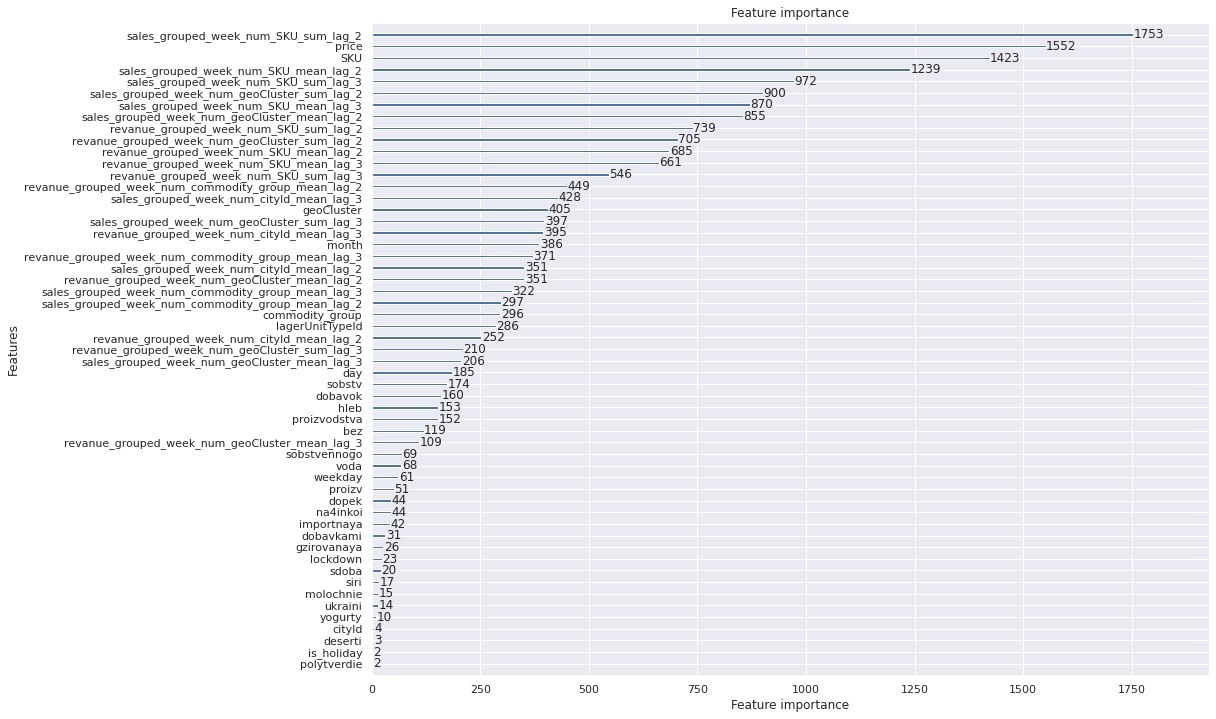

In [121]:
plot_importance(lgb_model,ax=plt.subplots(1,1,figsize=(15,12))[1])

### final train

In [122]:
# lgb_model = lgb.LGBMRegressor(feature_fraction= 0.75,
#                metric = 'mae',
#                max_depth = 16, 
#                min_data_in_leaf = 2**7, 
#                bagging_fraction = 0.75, 
#                learning_rate = 0.03, 
#                objective = 'mae', 
#                bagging_seed = 2**7, 
#                num_leaves = 200,
#                bagging_freq =1,
#                verbose = 1,
#             random_state=5,
#                              n_estimators=100)
# lgb_model.fit(train_X,train_y,eval_metric="mae", 
#     eval_set=[(val_X, val_y)], 
#     verbose=True, # 

### prediction for submission

In [123]:
sub_X = sub_data.drop(columns=['sales','ID','date','week_num','productCategory_caption_RU','lagerUnitQuantity','year'])

In [124]:
sub_X = sub_X.rename(columns=dict_mapping)

In [125]:
prediction = lgb_model.predict(sub_X)

In [126]:
np.mean(prediction)

0.03382135310206328

In [127]:
len(prediction)

1666028

In [128]:
sub_data['sales'] = prediction

In [129]:
sub_data.loc[sub_data['sales']<0,'sales']= 0

In [130]:
sub_data['sales'].mean()

0.033830813325337675

In [131]:
sub_data = sub_data[['ID','sales']]

In [132]:
sub_data.to_csv('submission_3.csv',index=False)